In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output_sequences_horizontal.csv')
df2 = pd.read_csv('full_links.csv',on_bad_lines = 'skip')
mydict={'1':"google.com"}

In [3]:
df.size

2624700

In [4]:
origcol = "1 google.com https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/%3Fgws_rd%3Dssl"
df2 = df2.rename(columns={origcol: 'data'})

In [5]:
for index,row in df2.iterrows():
    row_data = row['data'].split(" ") 
    mydict[row_data[0]] = row_data[1]

In [6]:
temp = list(df.columns)
for i in range (len(temp)):
    while '.' in temp[i]:
        temp[i] = temp[i][:-1]
    if i != 0:
        temp[i] = float(temp[i])

In [7]:
df.loc[-1] = temp  # Add a new row at index -1
df.index = df.index + 1  # Shift the index to make room for the new row
df = df.sort_index()

In [8]:
nname = ['index']+[str(i) for i in range (len(df.columns)-1)]
df.columns = nname

In [9]:
df.head()

,index,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,116.0,84.0,84.0,82.0,82.0,83.0,82.0,84.0,82.0,82.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,83.0,83.0,83.0,85.0,84.0,83.0,83.0,85.0,84.0,83.0
2,10,1.0,1.0,11.0,6.0,26.0,52.0,104.0,72.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,1.0,1.0,1.0,1.0,1.0,1.0,12.0,14.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000,1.0,1.0,1.0,1.0,1.0,7.0,3.0,27.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.size

2624752

In [11]:
tempdf = df.fillna('')
new_df = pd.DataFrame({
    'index': tempdf.iloc[:, 0],
    'values': [
        [float(x) for x in row[1:] if x != '']
        for _, row in tempdf.iterrows()
    ]
})

In [15]:
df_unique = new_df.drop_duplicates(subset='index', keep=False)

In [17]:
df_shuffled = df_unique.sample(frac=1).reset_index(drop=True)

In [21]:
mydict = {}
count = 0
for index,row in df_shuffled.iterrows():
    if count > 10:
        break
    mydict[row['index']] = row['values']
    count+=1

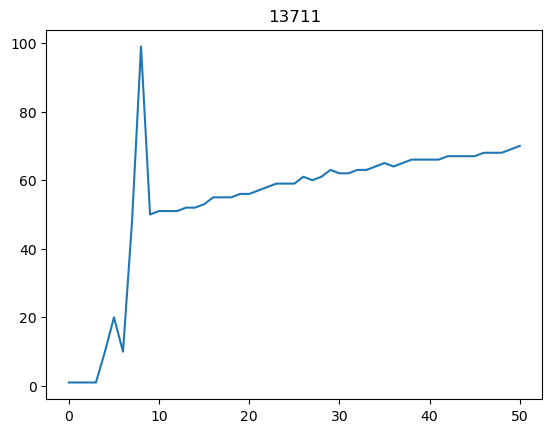

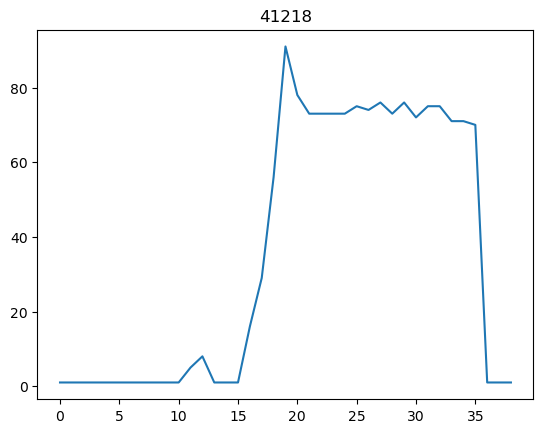

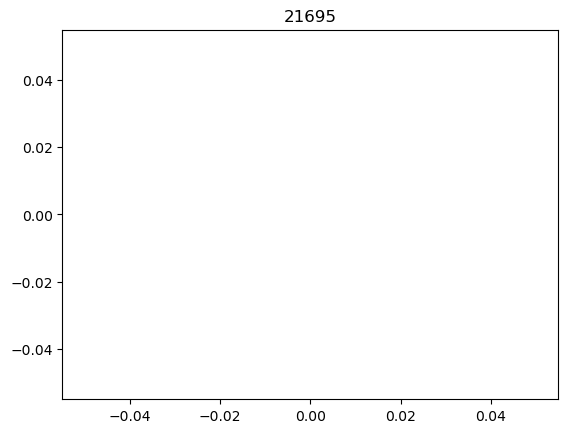

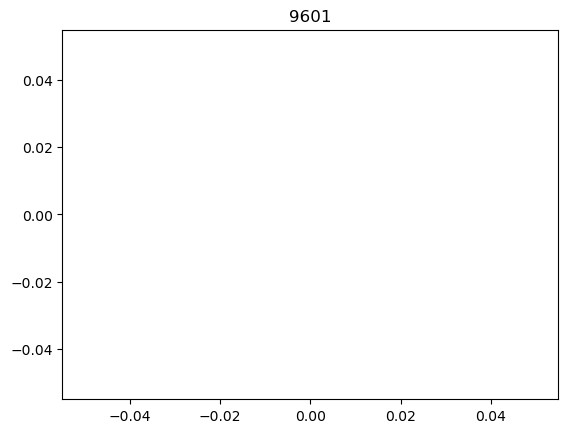

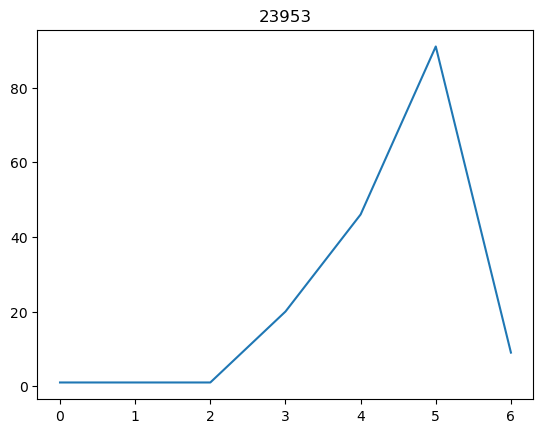

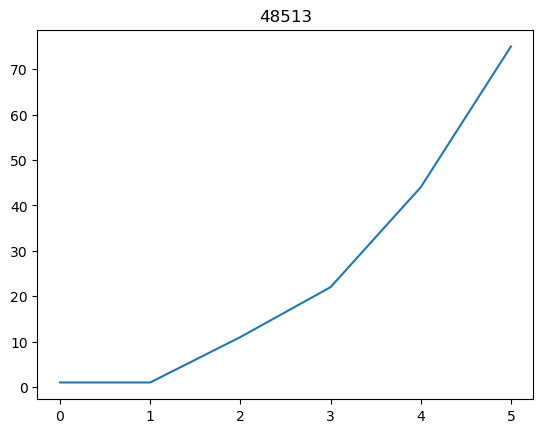

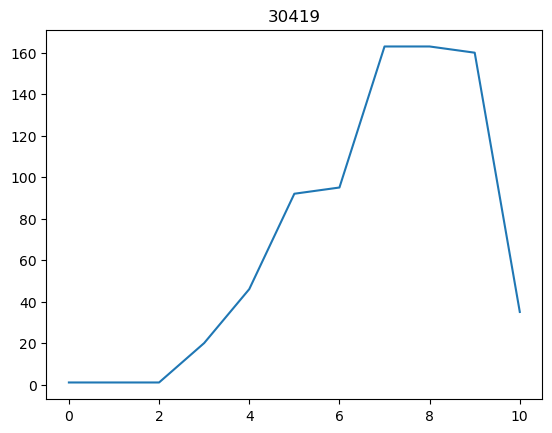

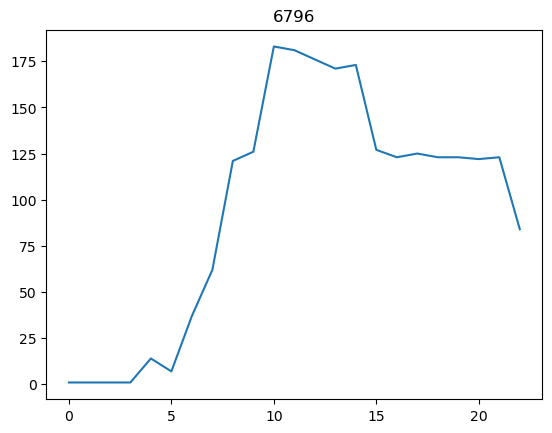

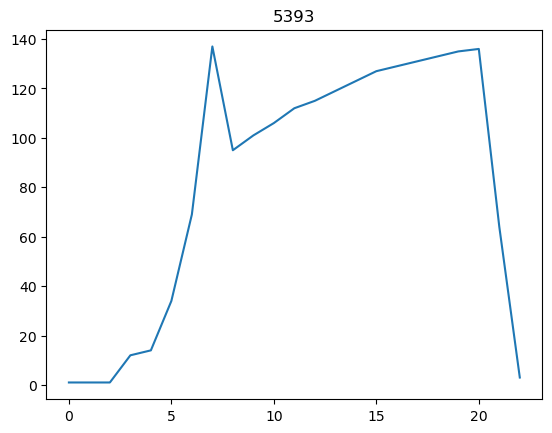

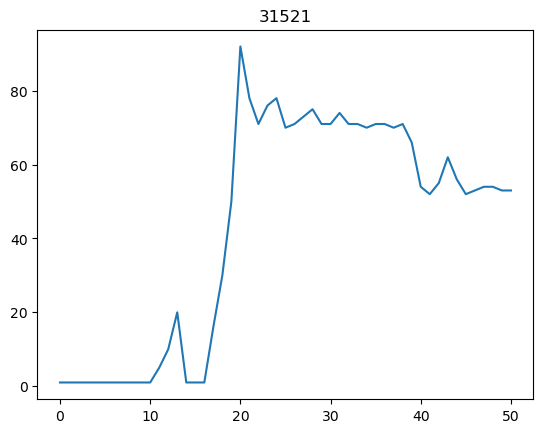

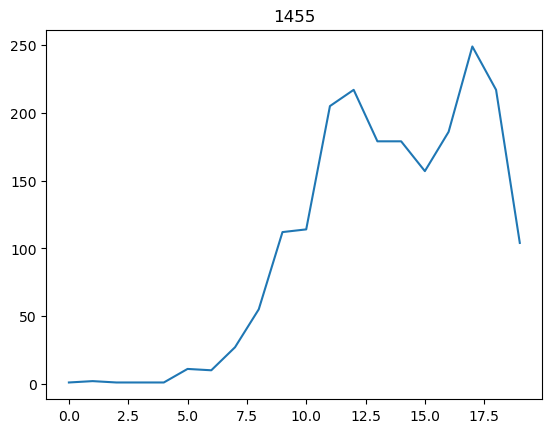

In [23]:
for x in mydict:
    xvals = [i for i in range (len(mydict[x]))]
    yvals = mydict[x]
    plt.plot(xvals,yvals)
    plt.title(str(x))
    plt.show()

In [28]:

getGrad(mydict[13711])

[  0.    0.    0.    4.5   9.5   0.   14.   44.5   1.  -24.    0.5   0.
   0.5   0.5   0.5   1.5   1.    0.    0.5   0.5   0.5   1.    1.    0.5
   0.    1.    0.5   0.    1.5   0.5  -0.5   0.5   0.5   0.5   1.    0.
   0.    1.    0.5   0.    0.    0.5   0.5   0.    0.    0.5   0.5   0.
   0.5   1.    1. ]
51 51


In [ ]:
plt.plot(xvals,cubic_control)
plt.show()

In [ ]:
plt.plot(xvals,bbr_control)